In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
file = "C:/Users/María Moya/Documents/GitHub/PROJECT_EDA_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE/src/data/Hello_Auto_data.xlsx"

In [126]:
df_conjunto = pd.read_excel(file,sheet_name = "Conjunto")
df_claims = pd.read_excel(file,sheet_name = "Claims")

| Column          | Description                                   | Type            | Clasificada como    |
|-----------------|-----------------------------------------------|-----------------|---------------------|
| policyId        | Número de identificación de póliza contratada | int64           | Numérica Continua   |
| policyStatus    | Estado de la póliza                           | object          | Binaria             |
| policyStartDate | Inicio de póliza                              | datetime64[ns]  | Numérica Discreta   |
| policyEndDate   | Final de póliza                               | datetime64[ns]  | Numérica Discreta   |
| tipoPoliza      | Tipo de póliza contratada                     | object          | Binaria             |
| customerId      | Número de identificación del cliente          | float64         | Numérica Continua   |
| age             | Años del cliente al contratar la póliza       | float64         | Numérica Discreta   |
| province        | Provincia del cliente                         | object          | Numérica Discreta   |
| vehicleId       | Número de identificación del vehículo asociado a la póliza | object | Numérica Continua   |
| fuel            | Tipo de combustible del vehículo              | object          | Categórica          |
| vehicleAge      | Años del vehículo                             | float64         | Numérica Discreta   |
| vehicletype     | Tipo de vehículo                              | object          | Categórica          |
| FAclaims        | Frecuencia absoluta de siniestros por póliza  | float64         | Numérica Discreta     |



In [127]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   policyId     12397 non-null  int64         
 1   claimId      12397 non-null  int64         
 2   claimDate    12397 non-null  datetime64[ns]
 3   claimStatus  12397 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 387.5+ KB


In [128]:
df_claims['FAclaims'] = df_claims['policyId'].map(df_claims['policyId'].value_counts()) 

In [129]:
df_conjunto['FAclaims'] = df_claims['policyId'].map(df_claims['policyId'].value_counts())

In [130]:
df_conjunto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38333 entries, 0 to 38332
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   policyId         38333 non-null  int64         
 1   policyStatus     38333 non-null  object        
 2   policyStartDate  38333 non-null  datetime64[ns]
 3   policyEndDate    38333 non-null  datetime64[ns]
 4   tipoPoliza       38333 non-null  object        
 5   customerId       38321 non-null  float64       
 6   age              38321 non-null  float64       
 7   province         38321 non-null  object        
 8   vehicleId        37019 non-null  object        
 9   fuel             37019 non-null  object        
 10  vehicleAge       37019 non-null  float64       
 11  vehicletype      37019 non-null  object        
 12  FAclaims         12397 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 3.8+ MB


In [131]:
(df_conjunto['age']==0.0).value_counts()
df_conjunto = df_conjunto.loc[df_conjunto['age'] !=0.0]

# Análisis Bivariante

In [132]:
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms

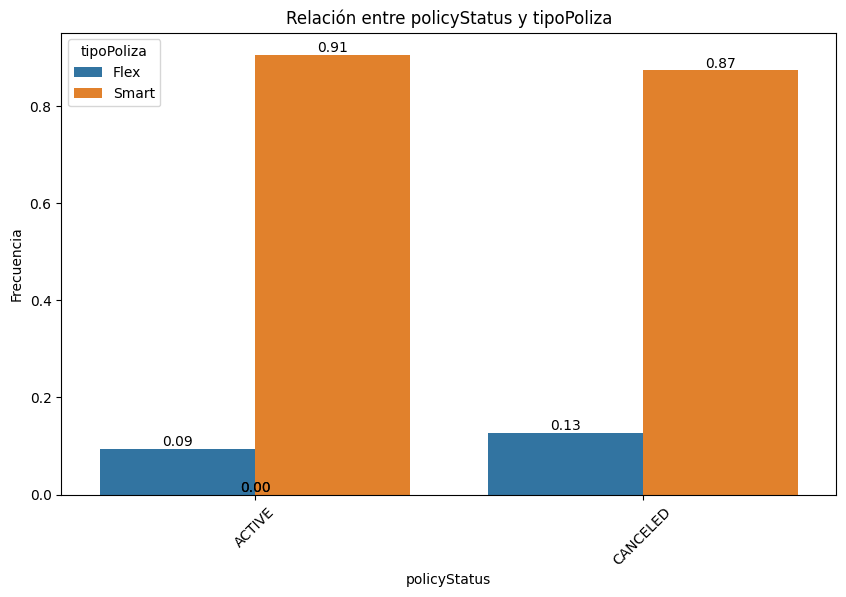

In [133]:
plot_categorical_relationship_fin(df_conjunto, "policyStatus","tipoPoliza", relative_freq = True, show_values = True)

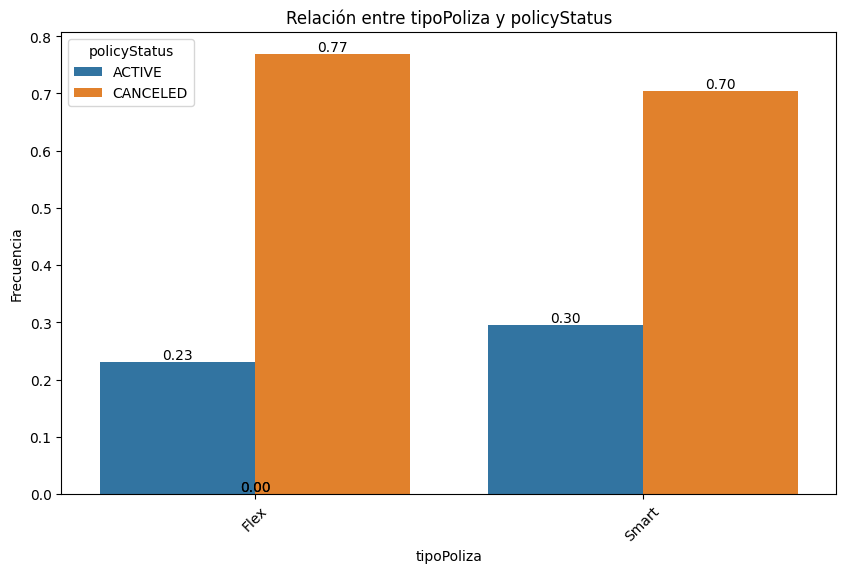

In [134]:
plot_categorical_relationship_fin(df_conjunto, "tipoPoliza","policyStatus", relative_freq = True, show_values = True)

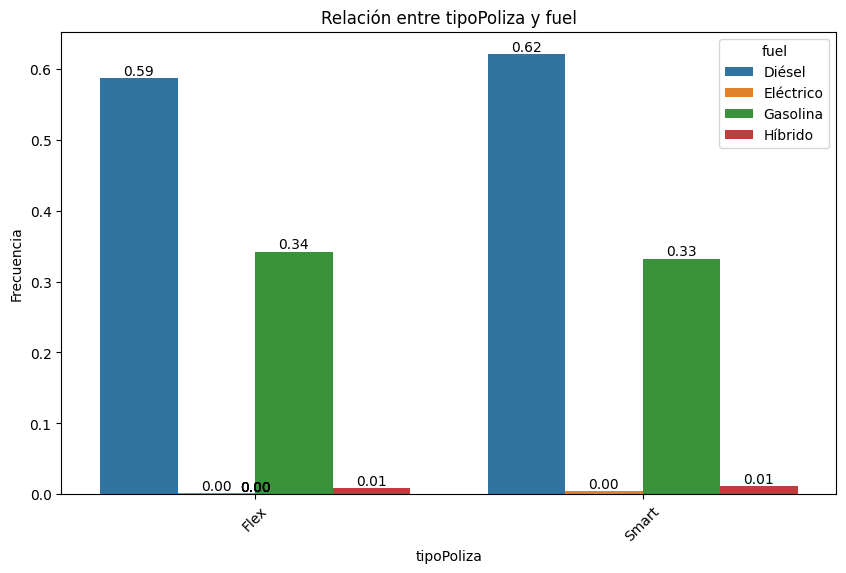

In [135]:
plot_categorical_relationship_fin(df_conjunto, "tipoPoliza", "fuel", relative_freq = True, show_values = True)

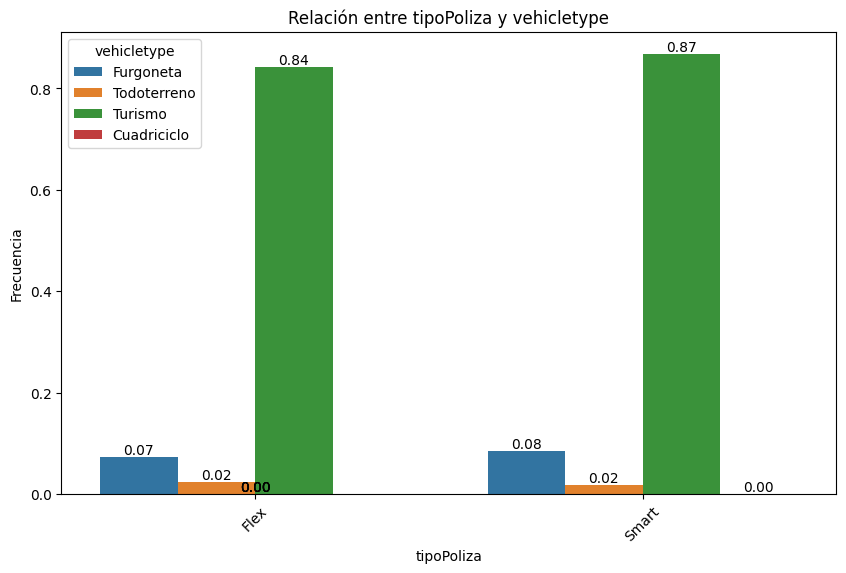

In [136]:
plot_categorical_relationship_fin(df_conjunto, "tipoPoliza", "vehicletype", relative_freq = True, show_values = True)

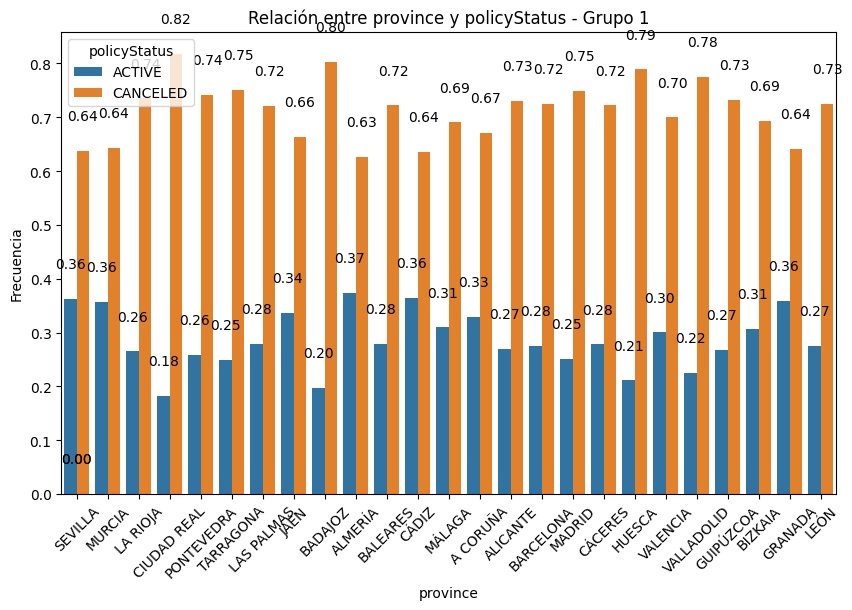

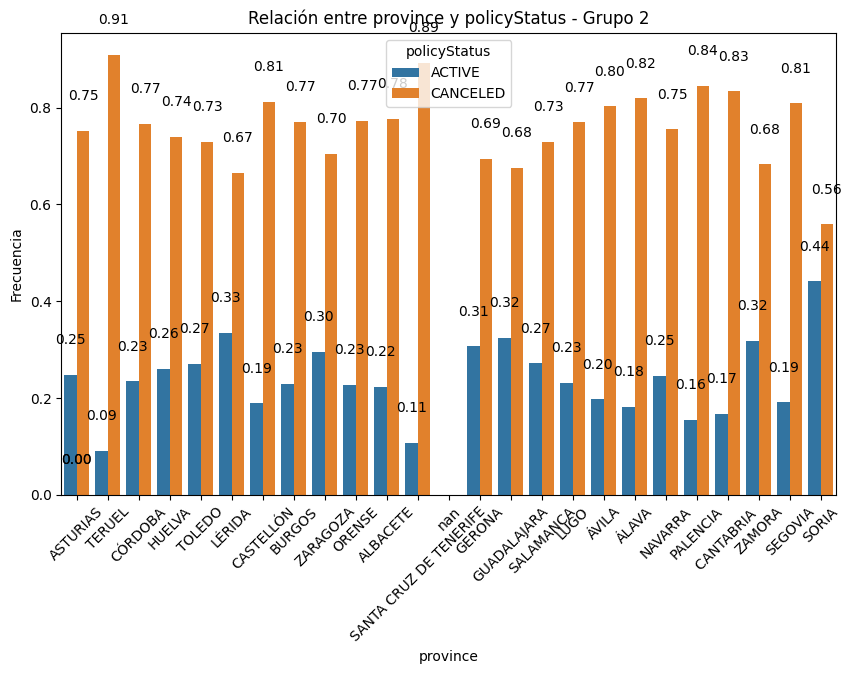

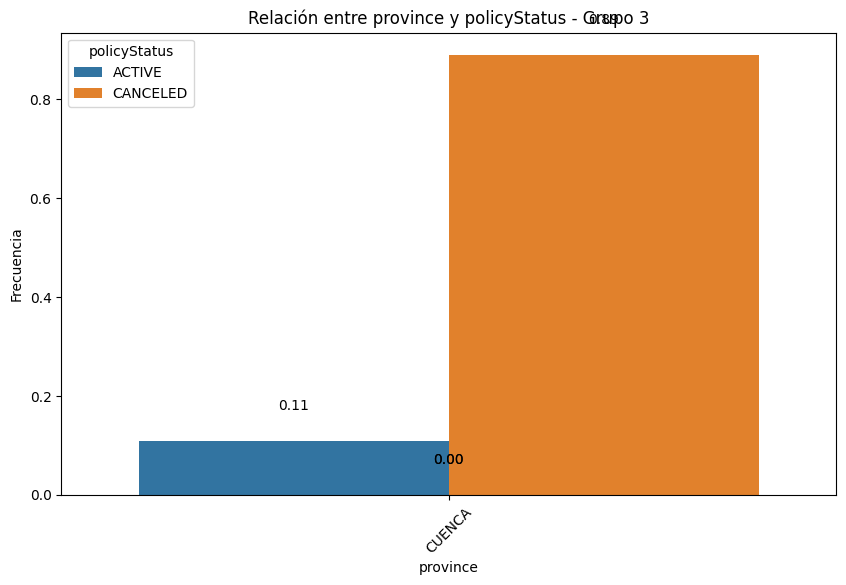

In [137]:
# Gráfico policyStatus/tipoPoliza en relación a las provincias
plot_categorical_relationship_fin(df_conjunto, "province","policyStatus", relative_freq = True, show_values = True, size_group=25
                                  )

In [138]:
df_conjunto.groupby("province", as_index = False)["policyStatus"].value_counts(normalize = True)

,province,policyStatus,proportion
0,A CORUÑA,CANCELED,0.670588
1,A CORUÑA,ACTIVE,0.329412
2,ALBACETE,CANCELED,0.776596
3,ALBACETE,ACTIVE,0.223404
4,ALICANTE,CANCELED,0.730769
...,...,...,...
95,ZARAGOZA,ACTIVE,0.295943
96,ÁLAVA,CANCELED,0.818898
97,ÁLAVA,ACTIVE,0.181102
98,ÁVILA,CANCELED,0.802469


In [139]:
df_conjunto.groupby("province", as_index = False)["tipoPoliza"].value_counts(normalize = True)

,province,tipoPoliza,proportion
0,A CORUÑA,Smart,0.869281
1,A CORUÑA,Flex,0.130719
2,ALBACETE,Smart,0.723404
3,ALBACETE,Flex,0.276596
4,ALICANTE,Smart,0.844406
...,...,...,...
95,ZARAGOZA,Flex,0.119332
96,ÁLAVA,Smart,0.866142
97,ÁLAVA,Flex,0.133858
98,ÁVILA,Smart,0.814815


In [140]:
df_conjunto

,policyId,policyStatus,policyStartDate,policyEndDate,tipoPoliza,customerId,age,province,vehicleId,fuel,vehicleAge,vehicletype,FAclaims
0,1,CANCELED,2020-06-03,2021-06-02,Smart,11.0,36.0,SEVILLA,9,Diésel,5.0,Turismo,1.0
1,2,CANCELED,2020-02-01,2021-01-31,Smart,17.0,33.0,MURCIA,13,Diésel,13.0,Turismo,1.0
2,4,ACTIVE,2023-02-01,2024-01-31,Smart,15.0,45.0,LA RIOJA,11,Diésel,2.0,Turismo,1.0
3,5,CANCELED,2020-02-01,2021-01-31,Smart,18.0,34.0,CIUDAD REAL,14,Diésel,7.0,Turismo,1.0
4,6,CANCELED,2021-02-02,2022-02-02,Smart,4.0,42.0,MURCIA,6,Gasolina,20.0,Turismo,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38328,38904,ACTIVE,2023-09-10,2024-09-09,Smart,1625839.0,34.0,TOLEDO,98648,Diésel,9.0,Turismo,NaN
38329,38905,CANCELED,2023-08-18,2024-08-17,Smart,161301.0,44.0,SEVILLA,98651,Diésel,12.0,Turismo,NaN
38330,38906,CANCELED,2023-08-18,2024-08-17,Smart,1053111.0,28.0,VALENCIA,98652,Gasolina,15.0,Turismo,NaN
38331,38907,ACTIVE,2023-08-21,2024-08-20,Smart,1625698.0,54.0,MURCIA,98405,Diésel,15.0,Turismo,NaN


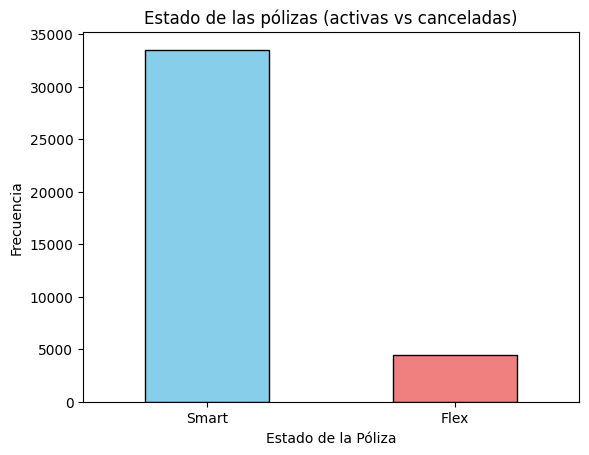

In [141]:
df_conjunto['tipoPoliza'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Estado de las pólizas (activas vs canceladas)')
plt.xlabel('Estado de la Póliza')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

# Univariantes
1. Distribución de las edades de los clientes al contratar la póliza
- Gráfico: Histograma
- Propósito: Ver la distribución de las edades de los clientes que han contratado pólizas.

In [142]:
df_conjunto["age"].describe()

count    37954.000000
mean        40.931443
std         11.629214
min         19.000000
25%         33.000000
50%         40.000000
75%         48.000000
max         85.000000
Name: age, dtype: float64

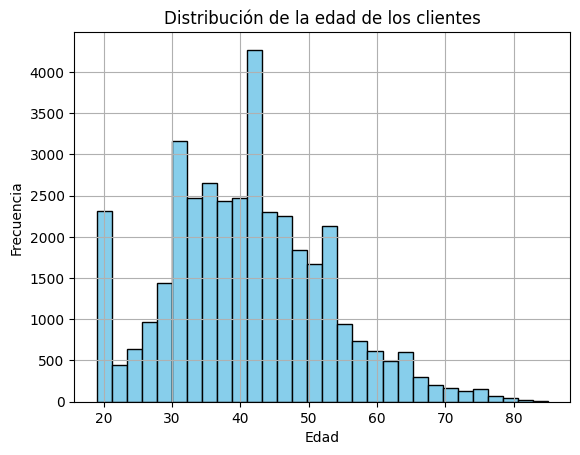

In [143]:
df_conjunto['age'].dropna().hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

2. Distribución del estado de las pólizas (policyStatus)
- Gráfico: Gráfico de barras
- Propósito: Ver cuántas pólizas están activas y cuántas han sido canceladas.

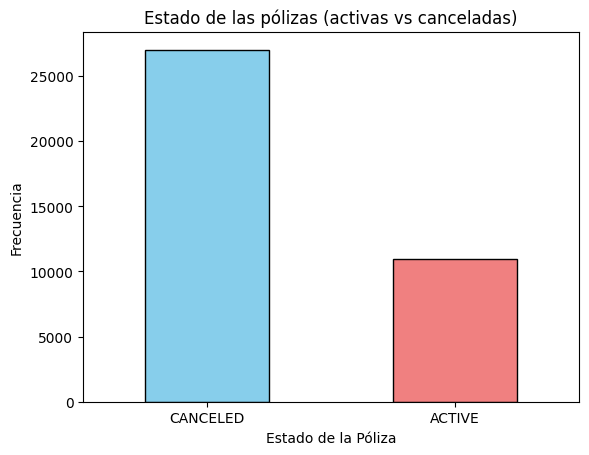

In [144]:
df_conjunto['policyStatus'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Estado de las pólizas (activas vs canceladas)')
plt.xlabel('Estado de la Póliza')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

3. Distribución de pólizas por provincia
Gráfico: Gráfico de barras
Propósito: Ver cómo se distribuyen las pólizas por provincias.

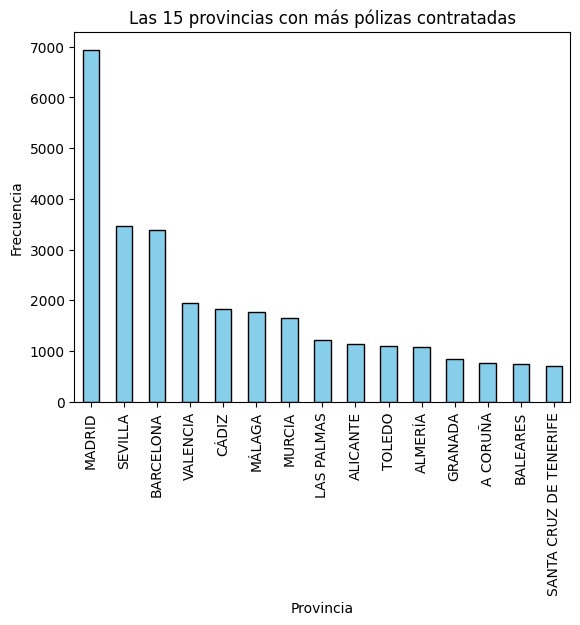

In [145]:
df_conjunto['province'].value_counts().head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Las 15 provincias con más pólizas contratadas')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

4. Distribución del tipo de combustible del vehículo
Gráfico: Gráfico de barras
Propósito: Ver qué tipo de combustible usan los vehículos asegurados.

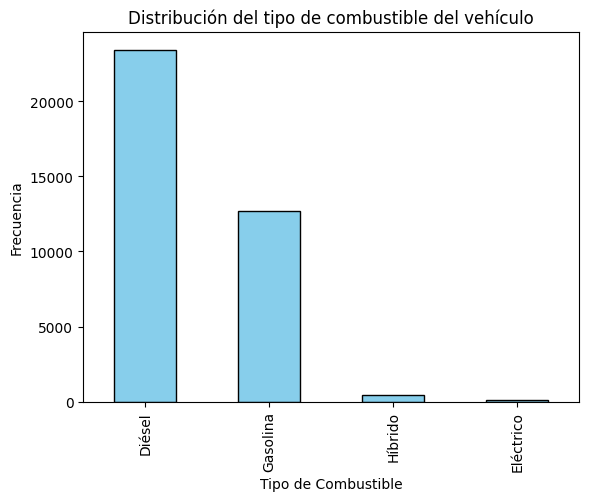

In [146]:
df_conjunto['fuel'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución del tipo de combustible del vehículo')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.show()

5. Frecuencia de siniestros por póliza (FAclaims)
Gráfico: Histograma o Boxplot
Propósito: Visualizar la distribución de la frecuencia de siniestros.

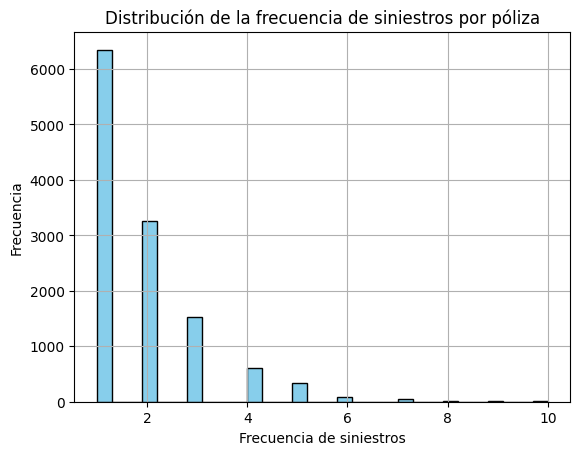

In [147]:
df_conjunto['FAclaims'].dropna().hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la frecuencia de siniestros por póliza')
plt.xlabel('Frecuencia de siniestros')
plt.ylabel('Frecuencia')
plt.show()

# Gráficos Bivariantes
6. Relación entre la edad del cliente y la frecuencia de siniestros (FAclaims)
Gráfico: Diagrama de dispersión
Propósito: Explorar si existe alguna relación entre la edad del cliente y la frecuencia de siniestros.

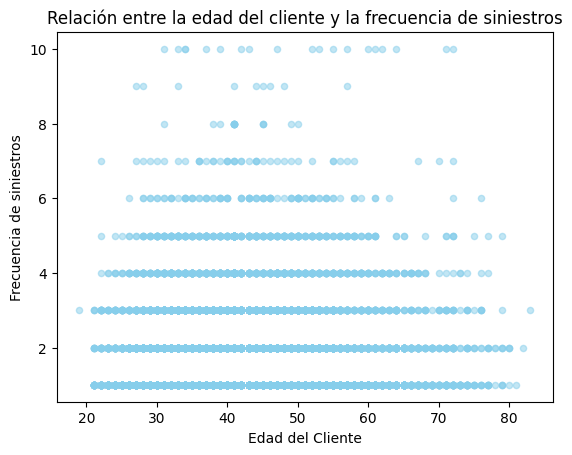

In [148]:
df_conjunto.dropna(subset=['age', 'FAclaims']).plot(kind='scatter', x='age', y='FAclaims', color='skyblue', alpha=0.5)
plt.title('Relación entre la edad del cliente y la frecuencia de siniestros')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia de siniestros')
plt.show()

7. Relación entre la edad del vehículo y la frecuencia de siniestros (FAclaims) Gráfico: Boxplot
Propósito: Ver si la edad del vehículo está relacionada con la frecuencia de siniestros.

<Figure size 1500x800 with 0 Axes>

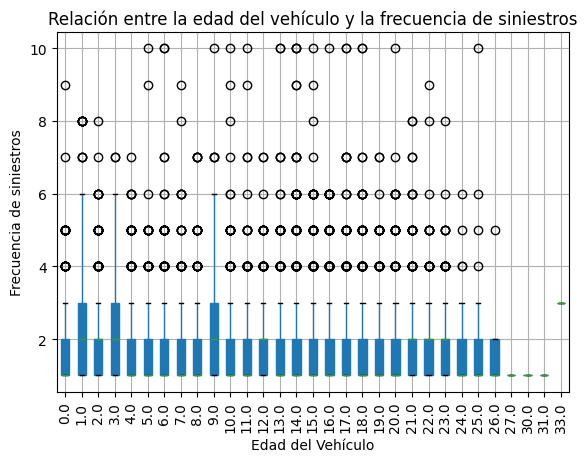

In [149]:
plt.figure(figsize=(15, 8))  
df_conjunto.dropna(subset=['vehicleAge', 'FAclaims']).boxplot(
    column='FAclaims', 
    by='vehicleAge', 
    patch_artist=True
)
plt.title('Relación entre la edad del vehículo y la frecuencia de siniestros')
plt.suptitle('')  
plt.xlabel('Edad del Vehículo')
plt.ylabel('Frecuencia de siniestros')
plt.xticks(rotation=90)  
plt.show()

8. Distribución del tipo de vehículo y la frecuencia de siniestros (FAclaims)
- Gráfico: Boxplot
- Propósito: Explorar la relación entre el tipo de vehículo y la frecuencia de siniestros.

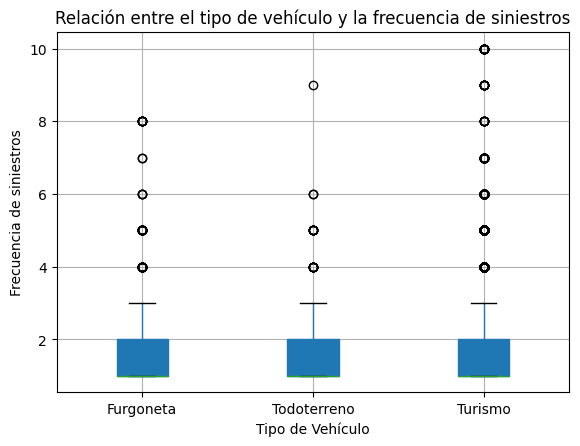

In [150]:
df_conjunto.dropna(subset=['FAclaims', 'vehicletype']).boxplot(column='FAclaims', by='vehicletype', patch_artist=True)
plt.title('Relación entre el tipo de vehículo y la frecuencia de siniestros')
plt.suptitle('')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Frecuencia de siniestros')
plt.show()

# Gráficos Multivariantes
9. Relación entre la edad del cliente y la edad del vehículo
- Gráfico: Diagrama de dispersión
- Propósito: Ver si existe alguna correlación entre la edad del cliente y la edad del vehículo


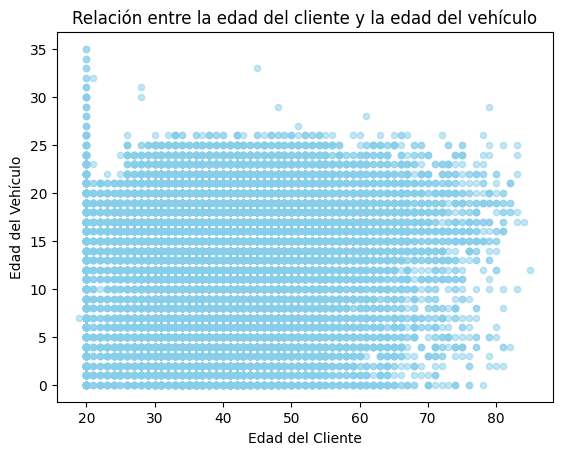

In [151]:
df_conjunto.dropna(subset=['age', 'vehicleAge']).plot(kind='scatter', x='age', y='vehicleAge', color='skyblue', alpha=0.5)
plt.title('Relación entre la edad del cliente y la edad del vehículo')
plt.xlabel('Edad del Cliente')
plt.ylabel('Edad del Vehículo')
plt.show()

10. Proporción de pólizas activas vs. canceladas según provincia
- Gráfico: Gráfico de barras apiladas
- Propósito: Ver cómo se distribuyen las pólizas activas y canceladas en diferentes provincias.

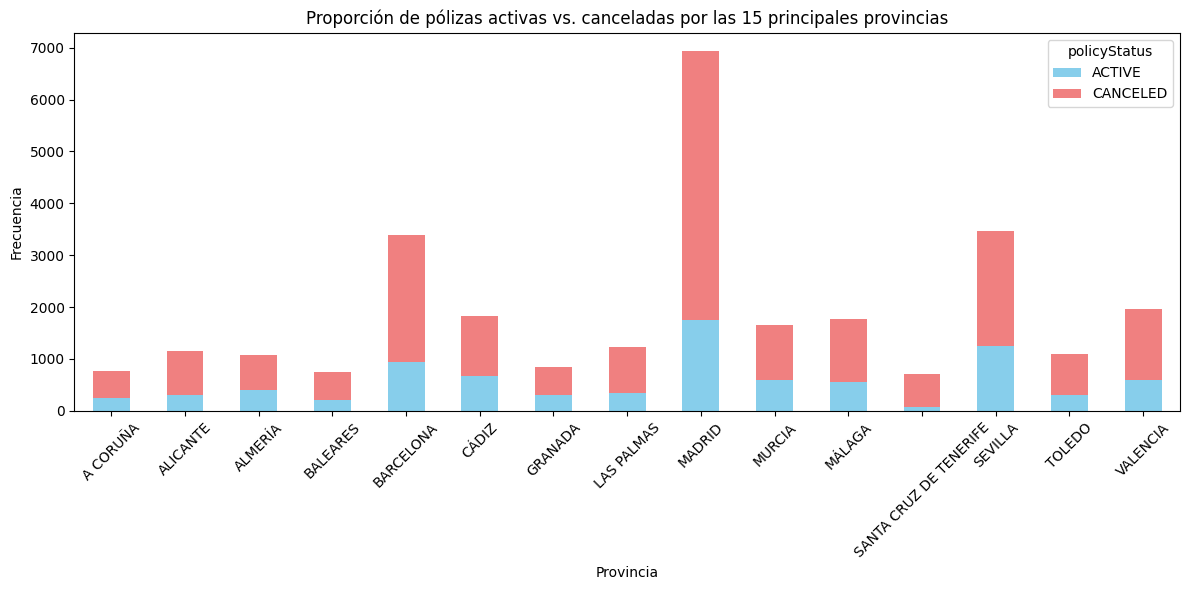

In [152]:
# Obtener las 15 provincias con más pólizas
top_provinces = df_conjunto['province'].value_counts().head(15).index

# Filtrar el DataFrame para incluir solo estas provincias
df_top_provinces = df_conjunto[df_conjunto['province'].isin(top_provinces)]

# Agrupar por provincia y estado de póliza, y luego trazar el gráfico apilado
df_top_provinces.groupby(['province', 'policyStatus']).size().unstack().plot(
    kind='bar', 
    stacked=True, 
    color=['skyblue', 'lightcoral'], 
    figsize=(12, 6)  # Aumentar el tamaño del gráfico
)

# Añadir títulos y etiquetas
plt.title('Proporción de pólizas activas vs. canceladas por las 15 principales provincias')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Ajustar la rotación para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente los márgenes
plt.show()


In [153]:
# Filtrar las provincias Madrid y Santa Cruz de Tenerife
provinces_filter = ['MADRID', 'SANTA CRUZ DE TENERIFE']
df_filtered = df_conjunto[df_conjunto['province'].isin(provinces_filter)]

# Calcular el total y las cancelaciones por provincia
cancelations = df_filtered[df_filtered['policyStatus'] == 'CANCELED'].groupby('province').size()
totals = df_filtered.groupby('province').size()

# Calcular el porcentaje de cancelaciones
percentages = (cancelations / totals) * 100

# Mostrar resultados
print(percentages)


province
MADRID                    74.909929
SANTA CRUZ DE TENERIFE    89.215686
dtype: float64


11. Distribución de la frecuencia de siniestros (FAclaims) por tipo de póliza
- Gráfico: Boxplot
- Propósito: Ver si existe alguna diferencia en la frecuencia de siniestros según el tipo de póliza.

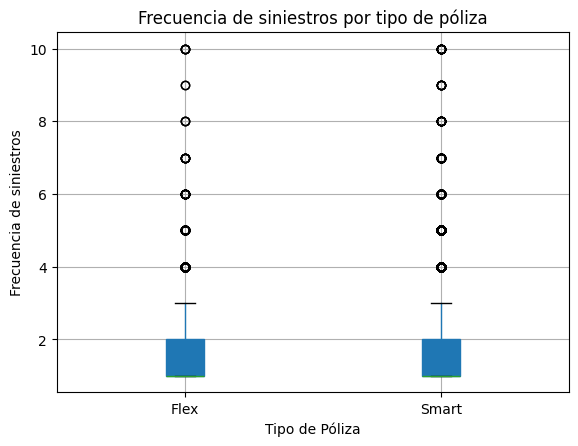

In [154]:
df_conjunto.dropna(subset=['FAclaims', 'tipoPoliza']).boxplot(column='FAclaims', by='tipoPoliza', patch_artist=True)
plt.title('Frecuencia de siniestros por tipo de póliza')
plt.suptitle('')
plt.xlabel('Tipo de Póliza')
plt.ylabel('Frecuencia de siniestros')
plt.show()

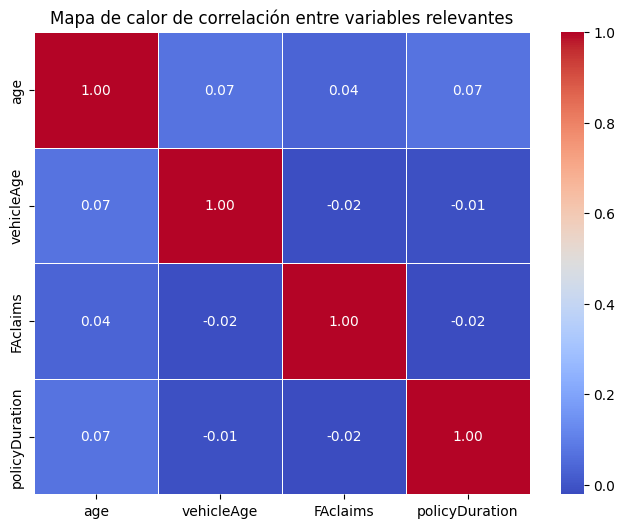

In [155]:
# Crear una nueva columna que calcule el tiempo activo de la póliza (en días)
df_conjunto['policyDuration'] = (df_conjunto['policyEndDate'] - df_conjunto['policyStartDate']).dt.days

# Seleccionar las columnas relevantes para el análisis
correlation_data = df_conjunto[['age', 'vehicleAge', 'FAclaims', 'policyDuration']]

# Eliminar filas con valores nulos en estas columnas
correlation_data = correlation_data.dropna()

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables relevantes')
plt.show()


C:\Users\María Moya\AppData\Local\Temp\ipykernel_8024\1164954127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipoPoliza', y='age', data=df_smart_flex, palette='Set2')


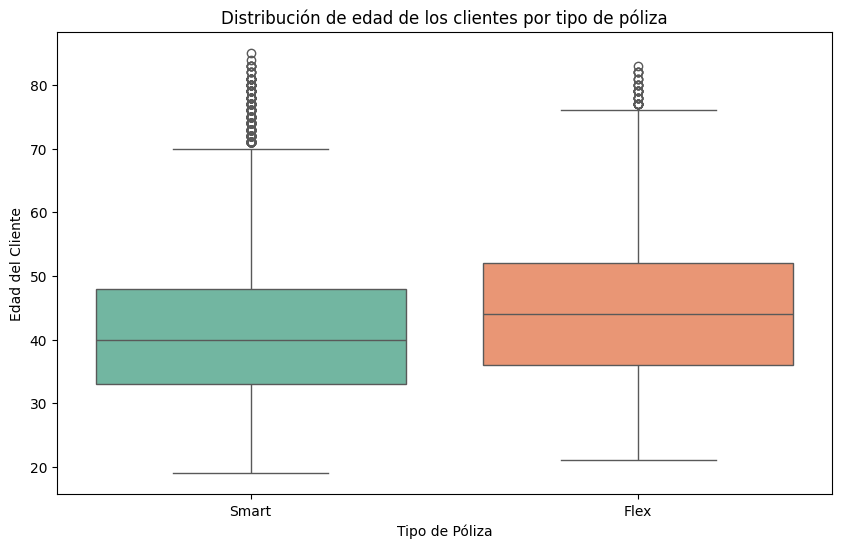

In [156]:
# Edad de los clientes por tipo de póliza
df_smart_flex = df_conjunto[df_conjunto['tipoPoliza'].isin(['Smart', 'Flex'])]
# Distribución de la edad de los clientes para pólizas Smart y Flex
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipoPoliza', y='age', data=df_smart_flex, palette='Set2')
plt.title('Distribución de edad de los clientes por tipo de póliza')
plt.xlabel('Tipo de Póliza')
plt.ylabel('Edad del Cliente')
plt.show()

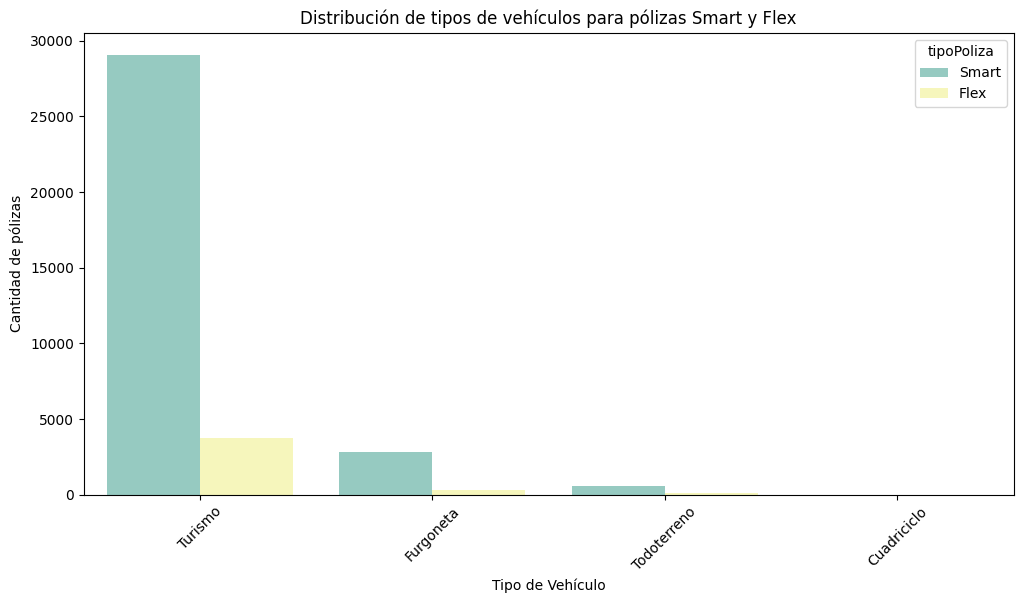

In [157]:
# Gráfico de barras para el tipo de vehículo
plt.figure(figsize=(12, 6))
sns.countplot(x='vehicletype', hue='tipoPoliza', data=df_smart_flex, palette='Set3')
plt.title('Distribución de tipos de vehículos para pólizas Smart y Flex')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de pólizas')
plt.xticks(rotation=45)
plt.show()

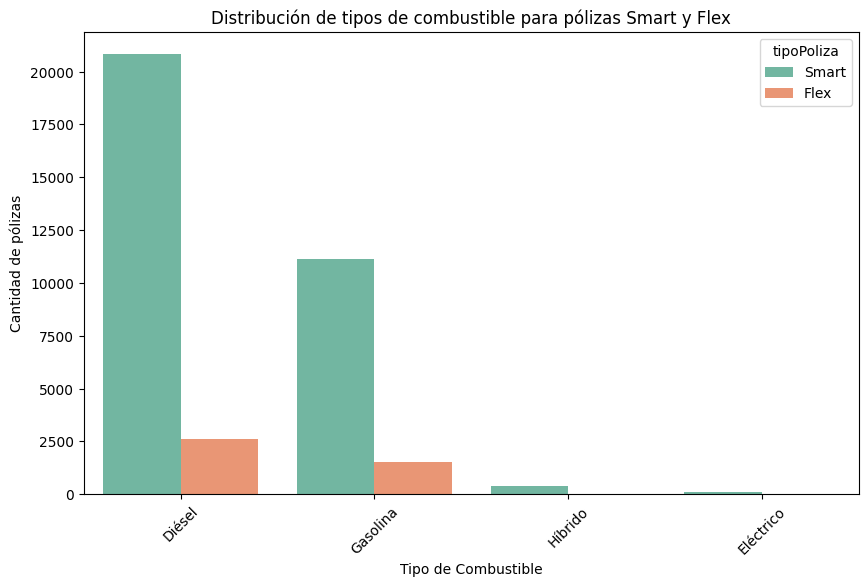

In [158]:
# Gráfico de barras para el tipo de combustible
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', hue='tipoPoliza', data=df_smart_flex, palette='Set2')
plt.title('Distribución de tipos de combustible para pólizas Smart y Flex')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad de pólizas')
plt.xticks(rotation=45)
plt.show()

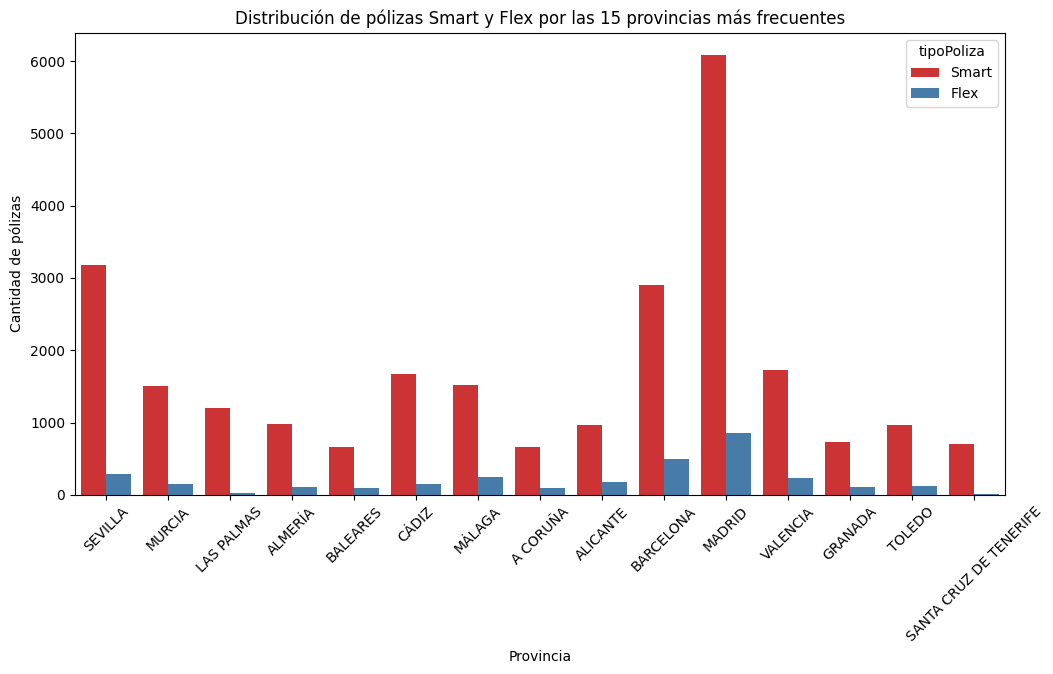

In [162]:
# Contamos las pólizas por provincia y seleccionamos las 15 provincias más frecuentes
top_15_provinces = df_conjunto['province'].value_counts().head(15).index

# Filtramos el dataframe para solo incluir las 15 provincias más frecuentes
df_top_15_provinces = df_smart_flex[df_smart_flex['province'].isin(top_15_provinces)]

# Gráfico de barras para ver cuántas pólizas Smart o Flex se contratan en cada una de las 15 provincias más frecuentes
plt.figure(figsize=(12, 6))
sns.countplot(x='province', hue='tipoPoliza', data=df_top_15_provinces, palette='Set1')
plt.title('Distribución de pólizas Smart y Flex por las 15 provincias más frecuentes')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de pólizas')
plt.xticks(rotation=45)
plt.show()



C:\Users\María Moya\AppData\Local\Temp\ipykernel_8024\1818010758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['is_active'] = df_2023['policyStatus'] == 'ACTIVE'
C:\Users\María Moya\AppData\Local\Temp\ipykernel_8024\1818010758.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['policyStartDate'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

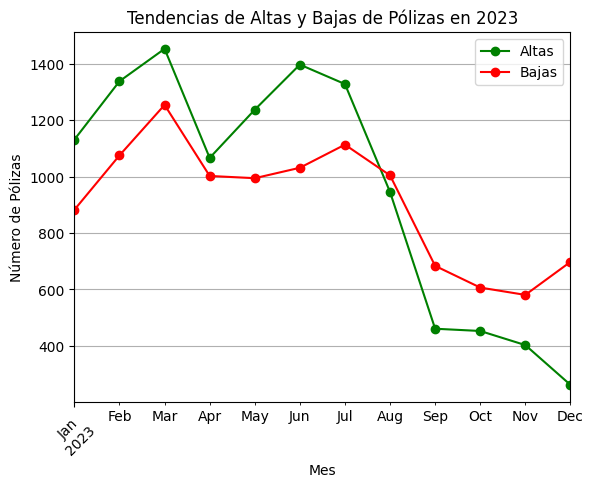

In [160]:
# Asegúrate de que la columna 'policyStartDate' esté en formato datetime
df_conjunto['policyStartDate'] = pd.to_datetime(df_conjunto['policyStartDate'])
df_conjunto['policyEndDate'] = pd.to_datetime(df_conjunto['policyEndDate'])

# Filtramos las pólizas dentro del año 2023
df_2023 = df_conjunto[(df_conjunto['policyStartDate'] >= '2023-01-01') & 
                      (df_conjunto['policyStartDate'] <= '2023-12-31')]

# Crear una columna para identificar si la póliza está activa o cancelada
df_2023['is_active'] = df_2023['policyStatus'] == 'ACTIVE'

# Agrupar por mes y tipo de evento (alta o baja)
df_2023['month'] = df_2023['policyStartDate'].dt.to_period('M')

# Contar las altas y bajas por mes
trend_data = df_2023.groupby(['month', 'is_active']).size().unstack().fillna(0)

# Graficar
plt.figure(figsize=(10, 6))
trend_data.plot(kind='line', marker='o', color=['green', 'red'])
plt.title('Tendencias de Altas y Bajas de Pólizas en 2023')
plt.xlabel('Mes')
plt.ylabel('Número de Pólizas')
plt.legend(['Altas', 'Bajas'])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


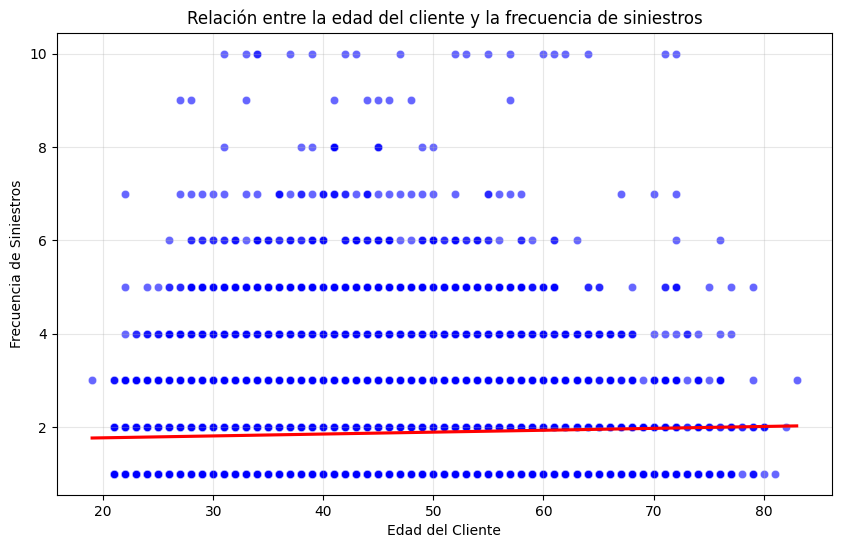

In [161]:
# Filtrar datos relevantes (eliminar filas con valores nulos en las columnas 'age' y 'FAclaims')
df_filtered = df_conjunto.dropna(subset=['age', 'FAclaims'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='FAclaims', data=df_filtered, alpha=0.6, color='blue')

# Añadir una línea de tendencia
sns.regplot(x='age', y='FAclaims', data=df_filtered, scatter=False, color='red', ci=None)

# Configuración del gráfico
plt.title('Relación entre la edad del cliente y la frecuencia de siniestros')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia de Siniestros')
plt.grid(True, alpha=0.3)
plt.show()